In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 7 類 為 horse


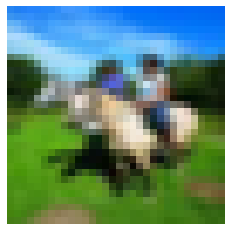

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet121
cnn = DenseNet121(include_top=False, weights="imagenet", input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = BatchNormalization()(cnn.output)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_DenseNet121.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.0001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=100,
          validation_split=0.1, callbacks=callback)

Epoch 1/100
150/150 [==============================] - 7s 44ms/step - loss: 1.8789 - accuracy: 0.3382 - val_loss: 1.6555 - val_accuracy: 0.4290
Epoch 2/100
150/150 [==============================] - 5s 30ms/step - loss: 1.5085 - accuracy: 0.4663 - val_loss: 1.4567 - val_accuracy: 0.4950
Epoch 3/100
150/150 [==============================] - 4s 30ms/step - loss: 1.3884 - accuracy: 0.5086 - val_loss: 1.3475 - val_accuracy: 0.5310
Epoch 4/100
150/150 [==============================] - 5s 31ms/step - loss: 1.3198 - accuracy: 0.5318 - val_loss: 1.2770 - val_accuracy: 0.5480
Epoch 5/100
150/150 [==============================] - 5s 30ms/step - loss: 1.2733 - accuracy: 0.5489 - val_loss: 1.2362 - val_accuracy: 0.5600
Epoch 6/100
150/150 [==============================] - 4s 30ms/step - loss: 1.2319 - accuracy: 0.5626 - val_loss: 1.2081 - val_accuracy: 0.5694
Epoch 7/100
150/150 [==============================] - 4s 30ms/step - loss: 1.2018 - accuracy: 0.5724 - val_loss: 1.1920 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.1079 - accuracy: 0.6105


[1.107933521270752, 0.6104999780654907]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[5.25484281e-03, 6.63250461e-02, 1.34573821e-02, ...,
        9.64697916e-03, 1.40685905e-02, 6.14375472e-02],
       [1.69325154e-02, 1.94346905e-01, 3.72685288e-04, ...,
        2.04056032e-05, 7.79745042e-01, 8.32761731e-03],
       [2.56986111e-01, 5.33938967e-03, 2.12399103e-03, ...,
        4.72822925e-03, 6.78971648e-01, 4.83037252e-03],
       ...,
       [1.67072270e-04, 1.53756391e-05, 3.22052315e-02, ...,
        9.65335220e-02, 6.15949539e-05, 8.45178904e-04],
       [4.52121049e-01, 2.85695754e-02, 3.18993956e-01, ...,
        2.69194599e-02, 1.07668934e-03, 6.52855437e-04],
       [1.21730001e-04, 1.71573600e-03, 5.97048434e-04, ...,
        9.70253527e-01, 9.11899609e-04, 2.47082254e-03]], dtype=float32)

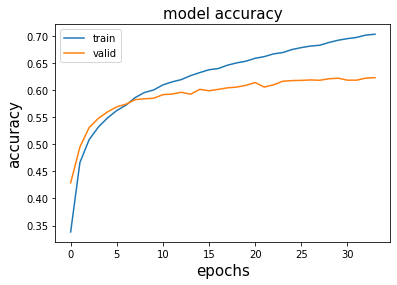

In [12]:
# 畫出 accuracy 圖
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

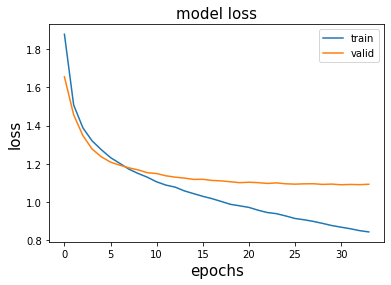

In [13]:
# 畫出 loss 圖
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy =0.587
#### 去掉一個 Dense 128 val_accuracy=0.568
#### 加了 dorpout(0.25) val_accuracy=0.59
#### 加了 batch_normlization val_accuracy=0.61
#### Adam(learning_rate=0.1) 由 0.001 改成 0.1 val_accuracy=0.097
#### Adam(learning_rate=0.0001) 由 0.1 改成 0.0001 val_accuracy=0.61
#### Adam(learning_rate=0.00001) 由 0.001 改成 0.00001 val_accuracy=0.6190
#### epochs=300, 最後在 103 停下, val_accuracy=0.6184
------------以上皆為沒有加入 weights="imagenet"時的情況------